# Part I -  Ford GoBike System Data
## by Cong Dinh

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [80]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nbconvert
import geopy.distance 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


### Gather data

In [81]:
# Load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

### Assess data

In [82]:
# Show the first 5 rows of the dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [83]:
# Show all unique values of each column in specified columns
print("Member Gender: ", df['member_gender'].unique())
print("User Type: ", df['user_type'].unique())
print("Bike Share for All Trip: ", df['bike_share_for_all_trip'].unique())

Member Gender:  ['Male' nan 'Other' 'Female']
User Type:  ['Customer' 'Subscriber']
Bike Share for All Trip:  ['No' 'Yes']


In [84]:
# Show data types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In this dataset, there are some missing values in start_station id and name, end_station id and name, member_birth_year, member_gender. But I don't think member_gender and member_birth_year are important for my analysis.

In [85]:
# Show number of rows and columns of the dataset
df.shape

(183412, 16)

In [86]:
# Check null values in the start_station_id column
df[df['start_station_id'].isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.5440,2019-02-02 12:27:12.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,2019-02-01 12:59:45.9690,2019-02-01 13:04:55.4260,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
179970,659,2019-02-01 12:17:37.6750,2019-02-01 12:28:37.0140,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
180106,2013,2019-02-01 11:33:55.1470,2019-02-01 12:07:28.9400,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


In [87]:
# Check lat and long of the null start_station_id
df[df['start_station_id'].isnull()]['start_station_latitude'].value_counts()

start_station_latitude
37.41    101
37.40     63
37.42     21
37.39     11
37.38      1
Name: count, dtype: int64

In [88]:
# Check lat and long of the null start_station_id
df[df['start_station_id'].isnull()]['start_station_longitude'].value_counts()

start_station_longitude
-121.94    57
-121.93    46
-121.96    46
-121.95    37
-121.92    10
-121.98     1
Name: count, dtype: int64

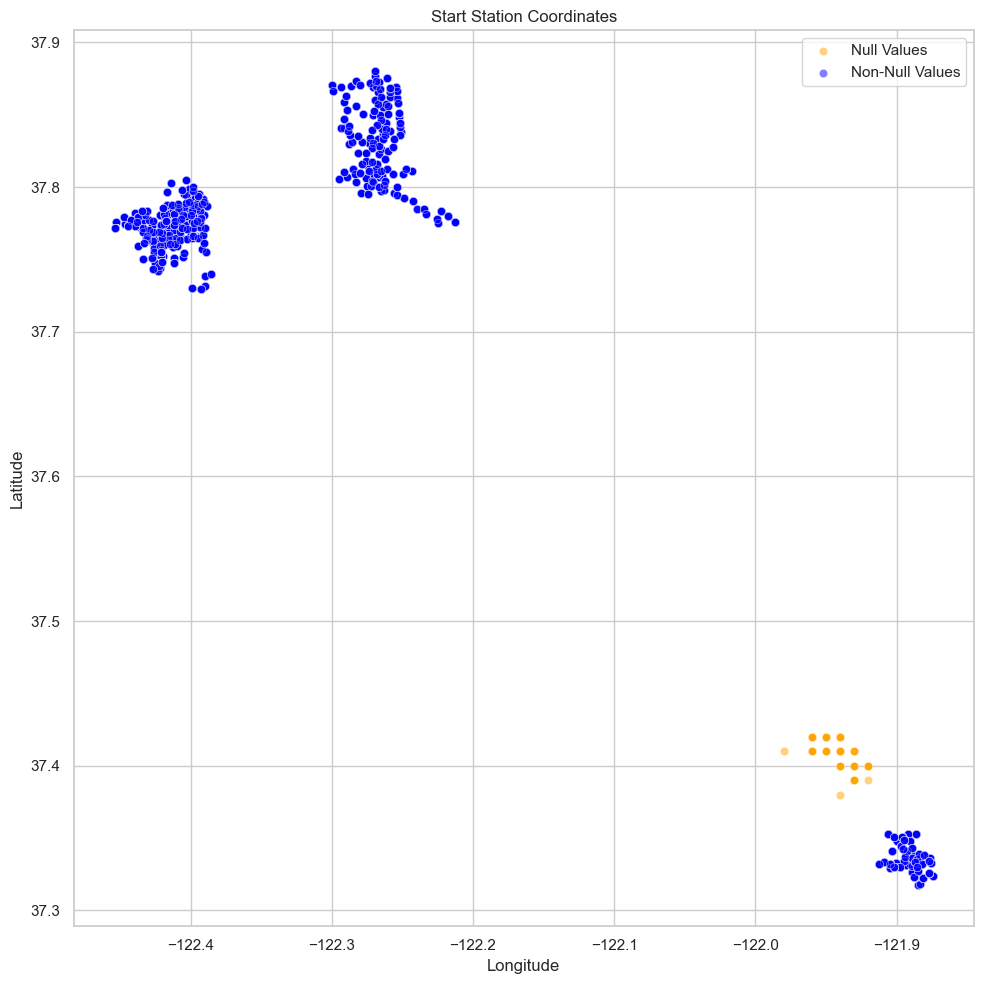

In [89]:
# plot all the start_station_latitude and start_station_longitude to see if there is any pattern
# fill orange for the null values
def plot_station_coordinates(df, x, y, null_column, title, xlabel, ylabel, colors=['orange', 'blue'], figsize=(10, 10)):
    with sns.plotting_context("notebook"):
        fig, ax = plt.subplots(figsize=figsize)
        sns.scatterplot(y=y, x=x, data=df[df[null_column].isnull()], color=colors[0], alpha=0.5, label='Null Values')
        sns.scatterplot(y=y, x=x, data=df.dropna(subset=[null_column]), color=colors[1], alpha=0.5, label='Non-Null Values')
        plt.ylabel(ylabel)
        plt.xlabel(xlabel)
        plt.title(title)
        plt.legend()
        plt.tight_layout()
        plt.show()

plot_station_coordinates(df, 'start_station_longitude', 'start_station_latitude', 'start_station_id', 'Start Station Coordinates', 'Longitude', 'Latitude')


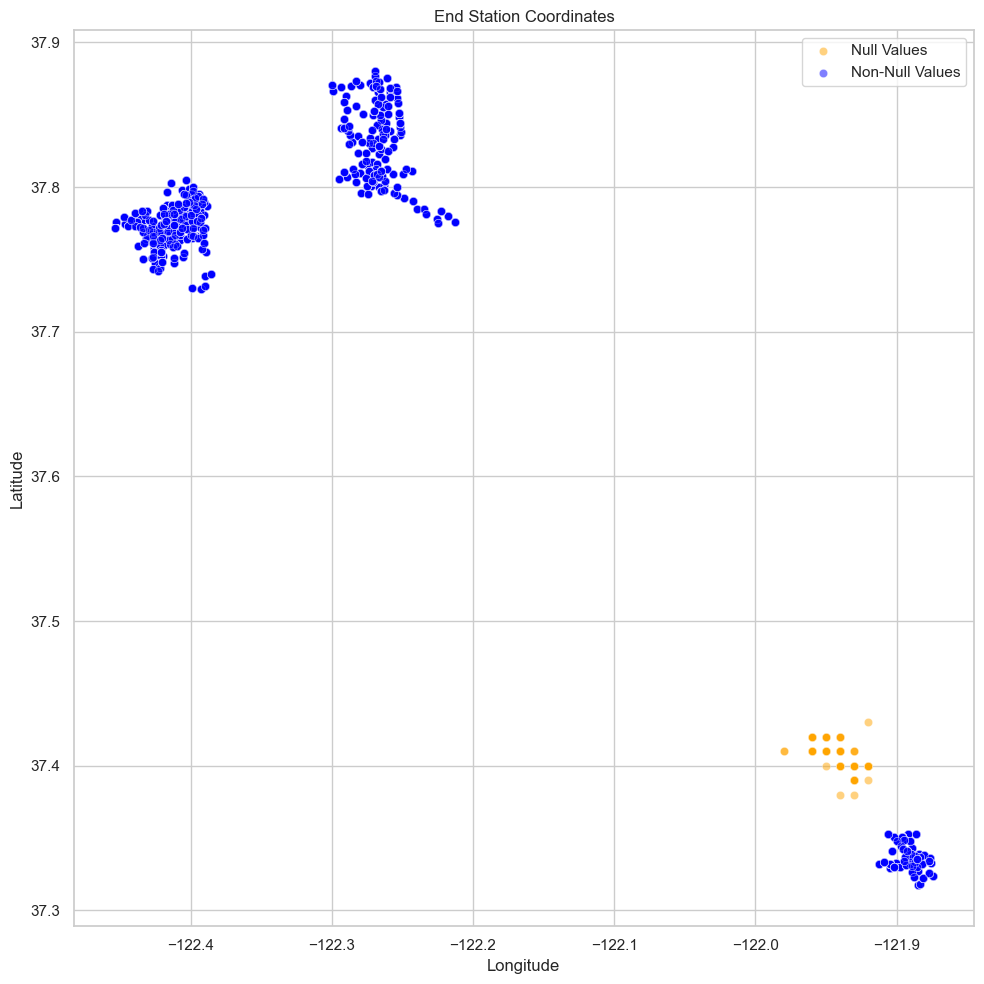

In [90]:
# plot all the end_station_latitude and end_station_longitude to see if there is any pattern
# fill orange for the null values
plot_station_coordinates(df, 'end_station_longitude', 'end_station_latitude', 'end_station_id', 'End Station Coordinates', 'Longitude', 'Latitude')

Based on 2 visualizations above, we can see a cluster contains all of the start_station_id and end_station_id with missing ids. So I think we can drop them in cleaning data step.

In [91]:
# Show descriptive statistics of the dataset
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [92]:
# Cheack records with duration_sec with maximum value
df[df['duration_sec'] == df['duration_sec'].max()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
101361,85444,2019-02-13 17:59:55.1240,2019-02-14 17:43:59.9540,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,6168,Subscriber,NaN,NaN,No


It seems that record with duration_sec is 86369 is an outlier. I will check it again in cleaning data step.

In [93]:
# Check number of stations
print("Number of start stations: ", df['start_station_id'].nunique())

Number of start stations:  329


In [94]:
# Show all start station with id, name, latitude and longitude
df[['start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude']].drop_duplicates().dropna().sort_values(by='start_station_id').reset_index(drop=True)


,start_station_id,start_station_name,start_station_latitude,start_station_longitude
0,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904
1,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915
2,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445
3,6.0,The Embarcadero at Sansome St,37.804770,-122.403234
4,7.0,Frank H Ogawa Plaza,37.804562,-122.271738
...,...,...,...,...
324,385.0,Woolsey St at Sacramento St,37.850578,-122.278175
325,386.0,24th St at Bartlett St,37.752105,-122.419724
326,388.0,Backesto Park (Jackson St at 13th St),37.352887,-121.886050
327,389.0,Taylor St at 9th St,37.353062,-121.891937


We have 329 stations in this dataset.

In [95]:
# Show all end station with id, name, latitude and longitude
df[['end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude']].drop_duplicates().dropna().sort_values(by='end_station_id').reset_index(drop=True)

,end_station_id,end_station_name,end_station_latitude,end_station_longitude
0,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904
1,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915
2,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445
3,6.0,The Embarcadero at Sansome St,37.804770,-122.403234
4,7.0,Frank H Ogawa Plaza,37.804562,-122.271738
...,...,...,...,...
324,385.0,Woolsey St at Sacramento St,37.850578,-122.278175
325,386.0,24th St at Bartlett St,37.752105,-122.419724
326,388.0,Backesto Park (Jackson St at 13th St),37.352887,-121.886050
327,389.0,Taylor St at 9th St,37.353062,-121.891937


We have same number of start_station_id and start_station_name, end_station_id and end_station_name.

### Cleaning data

1. Change data type of start_time and end_time to datetime.
2. Drop rows with missing values in start_station_id and end_station_id.

In [96]:
# 1. Change data type of start_time and end_time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])


In [97]:
# 2. Drop rows with null values in start_station_id and end_station_id
df.dropna(subset=['start_station_id', 'end_station_id'], inplace=True)

In [98]:
# Verify changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  int64         
 12  user_type            

In [99]:
# Save cleaned dataset to csv
df.to_csv('201902-fordgobike-tripdata-cleaned.csv', index=False)

### What is the structure of your dataset?

Dataset contains 183412 rows and 16 columns. The columns are:
1. duration_sec
   - Type: int64
   - Description: Duration of trip in seconds
   - Range: 61 to 85444
   - Mean: 726.078435
2. start_time
   - Type: object (datetime)
   - Description: Start time of trip
3. end_time
   - Type: object (datetime)
   - Description: End time of trip
4. start_station_id
   - Type: float64
   - Description: Start station ID
   - Range: 3.0 to 398.0
5. start_station_name
   - Type: object
   - Description: Start station name
6. start_station_latitude
   - Type: float64
   - Description: Start station latitude
   - Range: 37.317298 to 37.880222
7. start_station_longitude
   - Type: float64
   - Description: Start station longitude
   - Range: -122.453704 to -121.771662
8. end_station_id
   - Type: float64
   - Description: End station ID
   - Range: 3.0 to 398.0
9.  end_station_latitude
    - Type: float64
    - Description: End station latitude
    - Range: 37.317298 to 37.880222
10. end_station_longitude
    - Type: float64
    - Description: End station longitude
    - Range: -122.453704 to -121.771662
11. bike_id
    - Type: int64
    - Description: Bike ID
    - Range: 11 to 6645
12. user_type
    - Type: object
    - Description: User type
    - Range: Customer or Subscriber
13. member_birth_year
    - Type: float64
    - Description: Member birth year
14. member_gender
    - Type: object
    - Description: Member gender
15. bike_share_for_all_trip
    - Type: object
    - Description: Bike share for all trip

### What is/are the main feature(s) of interest in your dataset?

Main Feature(s) of Interest:
The main feature of interest in this dataset appears to be the duration_sec, which represents the duration of the bike trips in seconds. Understanding the distribution of trip durations and exploring factors that may influence trip duration could be valuable for various analyses.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Features to Support Investigation:

1. Time-related Features:
   - start_time and end_time: These features can be used to analyze the temporal aspects of bike trips, such as daily or hourly patterns, and explore whether there are peak hours or certain periods with higher or lower trip durations.

2. Geographical Features:
   - start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude: These features provide information about the geographical locations of the start and end stations, enabling the exploration of spatial patterns in trip durations.

3. User-related Features:
   - user_type: This feature can be used to analyze if there are differences in trip durations between different user types (Customers vs. Subscribers).
   - member_birth_year and member_gender: These features might help in understanding if the age or gender of the user correlates with the trip duration.

4. Bike-related Features:
   - bike_id: This feature could be used to explore whether certain bikes are associated with longer or shorter trip durations.

5. Bike Share Feature:
   - bike_share_for_all_trip: Analyzing whether users who share bikes for the entire trip have different trip durations compared to those who do not.


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

- What is the distribution of trip duration?
- How the trip duration is distributed with log scale?
- What is the distribution of user's type?
- How the distribution of member's birth year?
- What is the distribution of user's gender.
- How the distribution of bike share for all trip?
- What is the distribution of bike id?
- What is the distribution of start station id?
- What is the distribution of rental counts on day of week?
- What is the distribution of rental counts on hour of day?
- What is the distribution of trip distances?
- What is the distribution of user's age?
- Which start stations are the most popular?


1. What is the distribution of trip durations (duration_sec)?

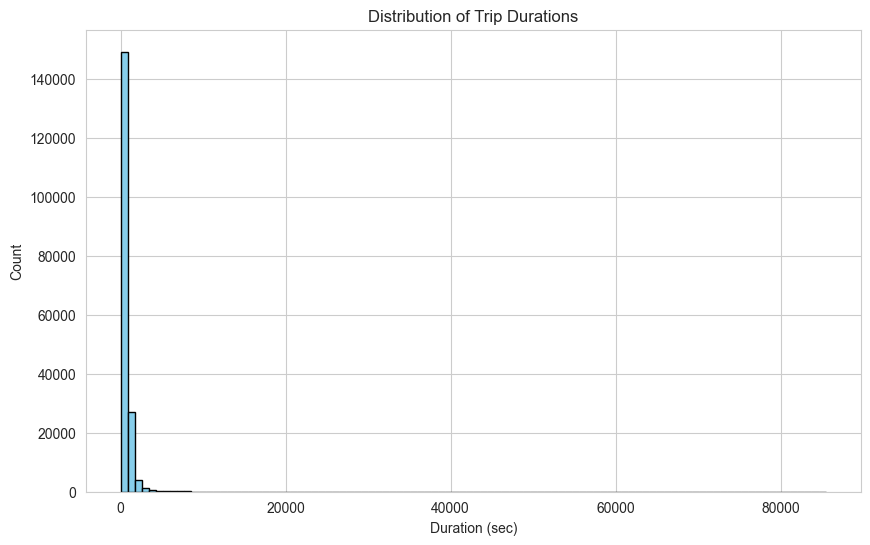

In [100]:
# What is the distribution of trip durations (duration_sec)?
# Visualization 1: Histogram of Trip Durations

# Define function to plot histogram
def plot_hist_matplotlib(df, x, title, xlabel, ylabel, bins=100, color='skyblue', edgecolor='black', figsize=(10, 6)):
    plt.figure(figsize=figsize)
    plt.hist(data=df, x=x, bins=bins, color=color, edgecolor=edgecolor)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot histogram of trip duration in seconds
plot_hist_matplotlib(df, 'duration_sec', 'Distribution of Trip Durations', 'Duration (sec)', 'Count')

Observations:

The histogram shows the distribution of trip durations.
Most trip durations seem to be concentrated on the lower end of the scale, with a long tail indicating some longer-duration trips.

2. How are trip durations distributed when considering the log scale?

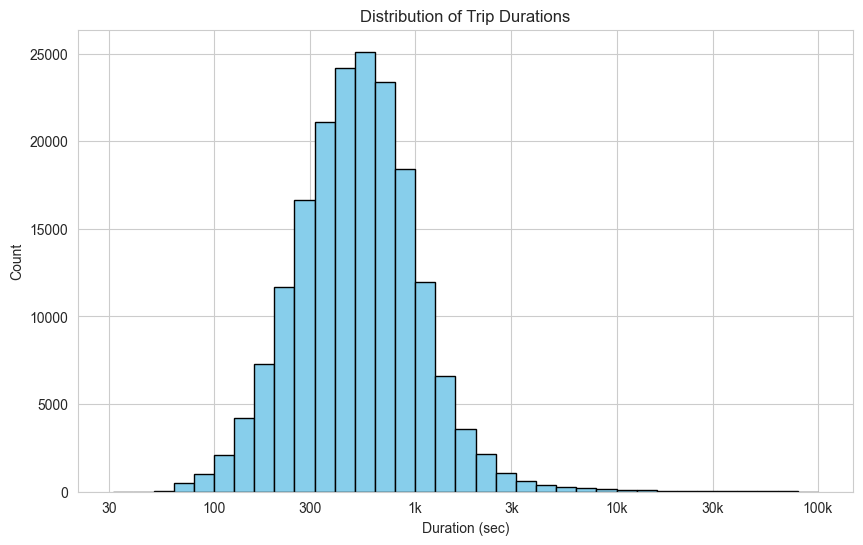

In [101]:
# 2. How are trip durations distributed when considering the log scale?
# Visualization 2: Histogram of Trip Durations (Log Scale)

# Define function to plot histogram with log scale
def plot_hist_log_scale(df, x, title, xlabel, ylabel, color='skyblue', edgecolor='black', figsize=(10, 6)):
    plt.figure(figsize=figsize)
    bin_edges = 10 ** np.arange(1.5, np.log10(df[x].max()) + 0.1, 0.1)
    plt.hist(data=df, x=x, bins=bin_edges, color=color, edgecolor=edgecolor)
    plt.xscale('log')
    plt.xticks([30, 100, 300, 1000, 3000, 10000, 30000, 100000], [30, 100, 300, '1k', '3k', '10k', '30k', '100k'])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot histogram of trip duration in seconds with log scale
plot_hist_log_scale(df, 'duration_sec', 'Distribution of Trip Durations', 'Duration (sec)', 'Count')

Observations:

Using a log scale reveals a clearer view of the distribution.
The majority of trips have durations less than 1000 seconds.

3. What is the distribution of user types (user_type)?

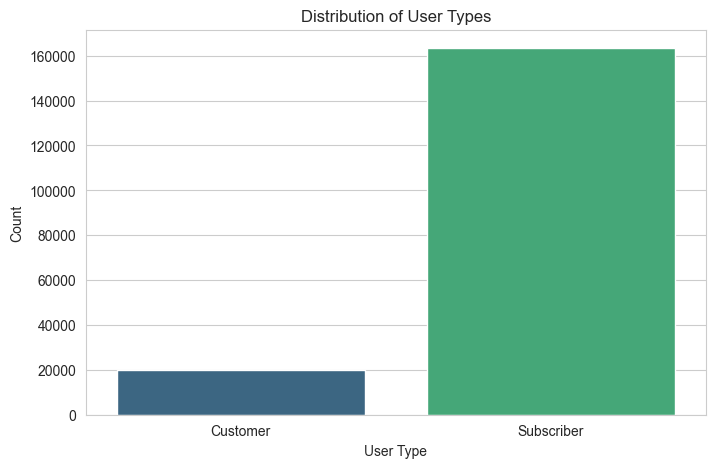

In [102]:
# 3. What is the distribution of user types (user_type)?
# Visualization 3: Bar Chart of User Types

# Define function to plot bar chart
def plot_count_seaborn(df, x, title, xlabel, ylabel, palette='viridis', figsize=(8, 5)):
    plt.figure(figsize=figsize)
    sns.countplot(data=df, x=x, palette=palette, hue=x, legend=False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot bar chart of user types
plot_count_seaborn(df, 'user_type', 'Distribution of User Types', 'User Type', 'Count')

Observations:

The bar chart shows the distribution of user types.
There are more subscribers than customers in the dataset.

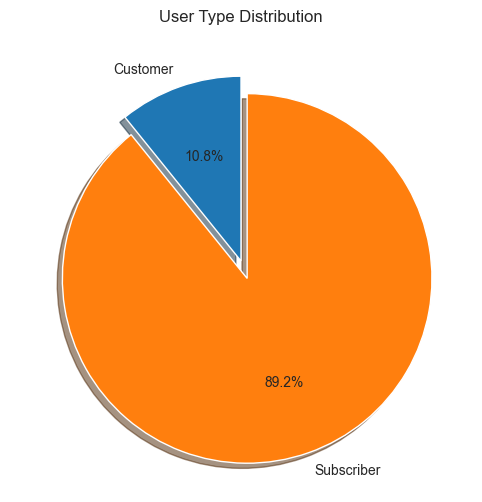

In [103]:
def plot_user_type_distribution(df, user_type_column, labels=['Customer', 'Subscriber'], explode=[0, 0.1], figsize=(10, 6)):
    customer_ratio = df.query(f'{user_type_column} == "{labels[0]}"').shape[0] / df.shape[0]
    subscriber_ratio = df.query(f'{user_type_column} == "{labels[1]}"').shape[0] / df.shape[0]

    pie_data = [customer_ratio, subscriber_ratio]
    fig, ax = plt.subplots(figsize=figsize)
    plt.pie(pie_data, explode=explode, labels=labels, startangle=90, autopct='%1.1f%%', shadow=True)
    plt.title('User Type Distribution')
    plt.show()

plot_user_type_distribution(df, 'user_type')

The subscriber type with 89.2% is much higher than the customer type with 10.8%.

4. How is the distribution of member birth years (member_birth_year)?

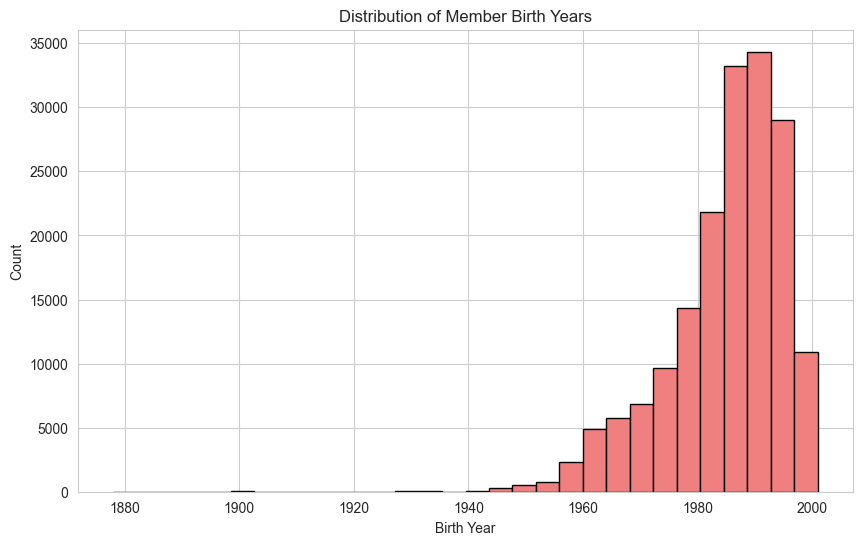

In [104]:
# 4. How is the distribution of member birth years (member_birth_year)?
# Visualization 4: Histogram of Member Birth Years

# Define function to plot histogram
def plot_hist_birth_year(df, x, title, xlabel, ylabel, bins=30, color='lightcoral', edgecolor='black', figsize=(10, 6)):
    plt.figure(figsize=figsize)
    plt.hist(data=df, x=x, bins=bins, color=color, edgecolor=edgecolor)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot histogram of member birth years
plot_hist_birth_year(df, 'member_birth_year', 'Distribution of Member Birth Years', 'Birth Year', 'Count')

Observations:

The histogram shows the distribution of member birth years.
There might be some outliers or data quality issues, as there are negative birth years.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

5. What is the distribution of member genders (member_gender)?

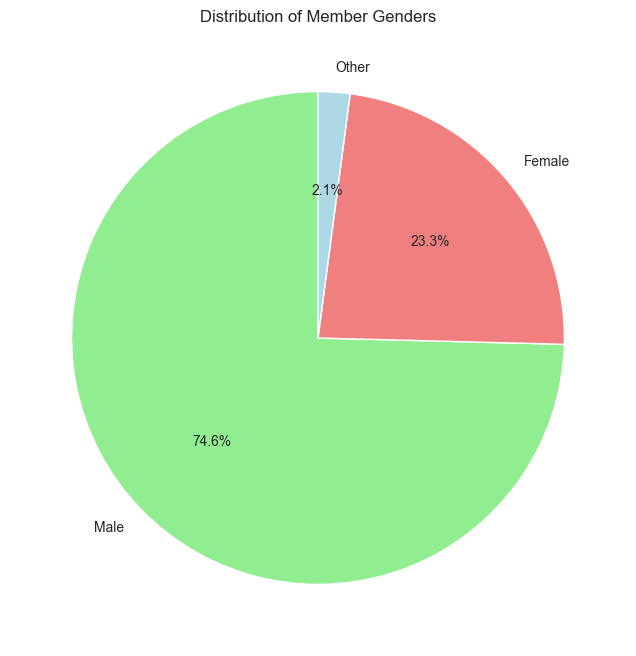

In [105]:
# 5. What is the distribution of member genders (member_gender)?
# Visualization 5: Pie Chart of Member Genders

# Define function to plot pie chart
def plot_pie_gender(df, x, title, colors=['lightgreen', 'lightcoral', 'lightblue'], figsize=(8, 8)):
    plt.figure(figsize=figsize)
    gender_counts = df[x].value_counts()
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(title)
    plt.show()

# Plot Pie Chart of Member Genders
plot_pie_gender(df, 'member_gender', 'Distribution of Member Genders')


Observations:

The pie chart illustrates the distribution of member genders.
The majority of members have a gender label of 'Male,' followed by 'Female' and 'Other.'

6. How is the distribution of bike share for the entire trip (bike_share_for_all_trip)?

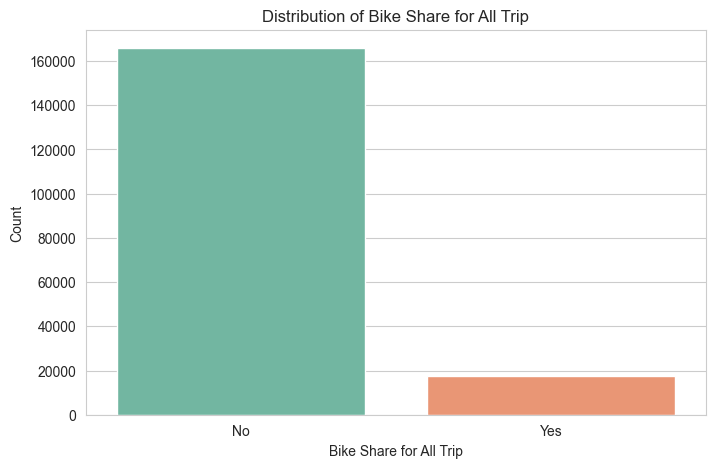

In [106]:
# 6. How is the distribution of bike share for the entire trip (bike_share_for_all_trip)?
# Visualization 6: Bar Chart of Bike Share for All Trip

# Define function to plot bar chart
def plot_count_bike_share(df, x, title, xlabel, ylabel, palette='Set2', figsize=(8, 5)):
    plt.figure(figsize=figsize)
    sns.countplot(data=df, x=x, palette=palette, hue=x, legend=False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot bar chart of bike share for all trip
plot_count_bike_share(df, 'bike_share_for_all_trip', 'Distribution of Bike Share for All Trip', 'Bike Share for All Trip', 'Count')

Observations:

The bar chart displays the distribution of bike share for the entire trip.
The majority of trips do not involve bike sharing for the entire trip.

7. What is the distribution of bike IDs (bike_id)?

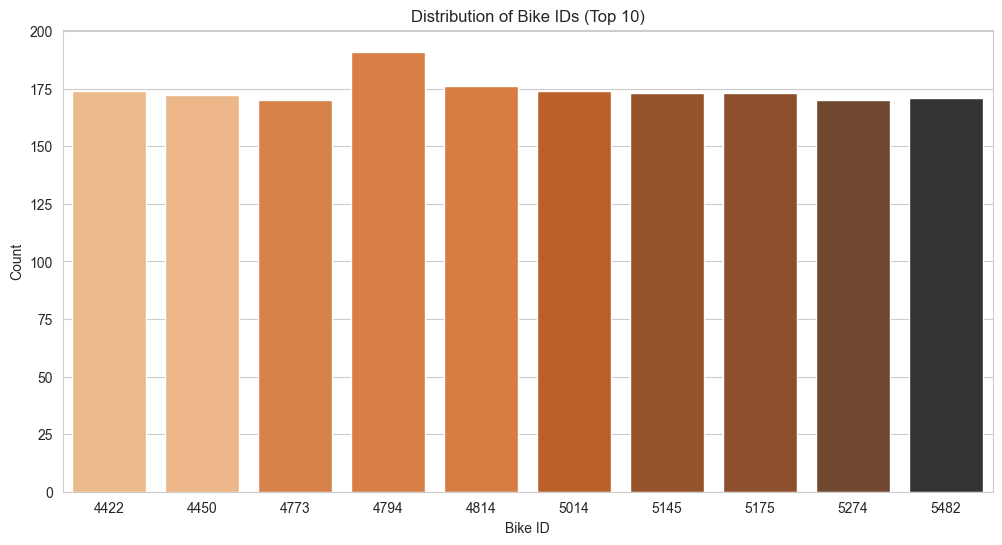

In [107]:
# 7. What is the distribution of bike IDs (bike_id)?
# Visualization 7: Bar Chart of Bike IDs (Top 10)

# Define function to plot bar chart
def plot_bar_bike_ids(df, x, title, xlabel, ylabel, palette='Oranges_d', top=10, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    top_bikes = df[x].value_counts().head(top)
    sns.barplot(x=top_bikes.index, y=top_bikes.values, palette=palette, hue=top_bikes.index, legend=False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot bar chart of bike IDs (top 10)
plot_bar_bike_ids(df, 'bike_id', 'Distribution of Bike IDs (Top 10)', 'Bike ID', 'Count')

Observations:

The bar chart presents the distribution of the top 10 bike IDs based on trip counts.
Some bikes have significantly more trips than others.

8. What is the distribution of start station IDs (start_station_id)?

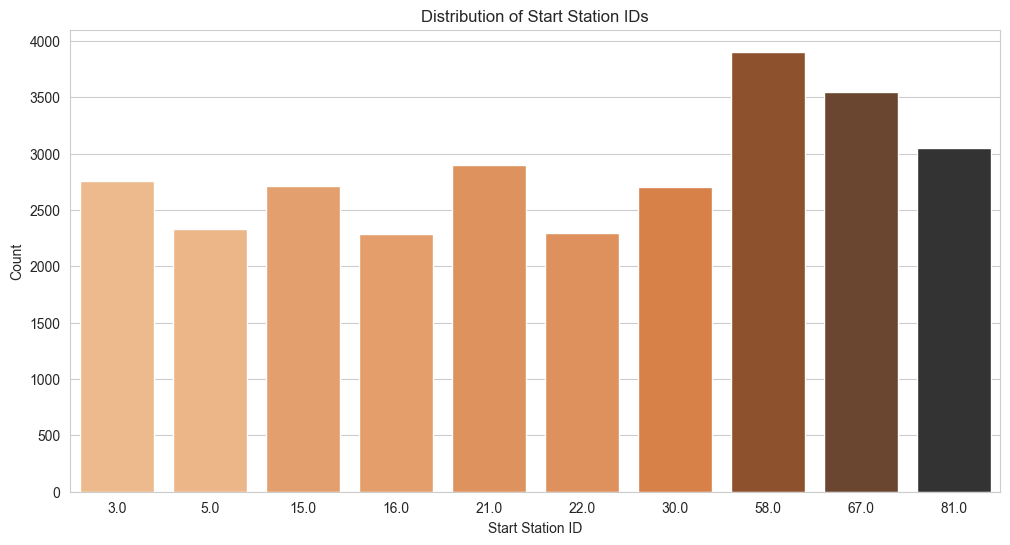

In [108]:
# 8. What is the distribution of start station IDs (start_station_id)?
# Visualization 8: Bar Chart of Start Station IDs (Top 10)

# Define function to plot bar chart
def plot_bar_start_stations(df, x, title, xlabel, ylabel, palette='Oranges_d', top=10, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    top_start_stations = df[x].value_counts().head(top)
    sns.barplot(x=top_start_stations.index, y=top_start_stations.values, palette=palette, hue=top_start_stations.index, legend=False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot bar chart of start station IDs
plot_bar_start_stations(df, 'start_station_id', 'Distribution of Start Station IDs', 'Start Station ID', 'Count')

Observations:

The bar chart illustrates the distribution of the top 10 start station IDs based on trip counts.
Some start stations have significantly more trips than others.

9. What is the distribution of rental counts on day of week?

In [109]:
# Extract day of week from start_time
df['day_of_week'] = df['start_time'].dt.day_name()

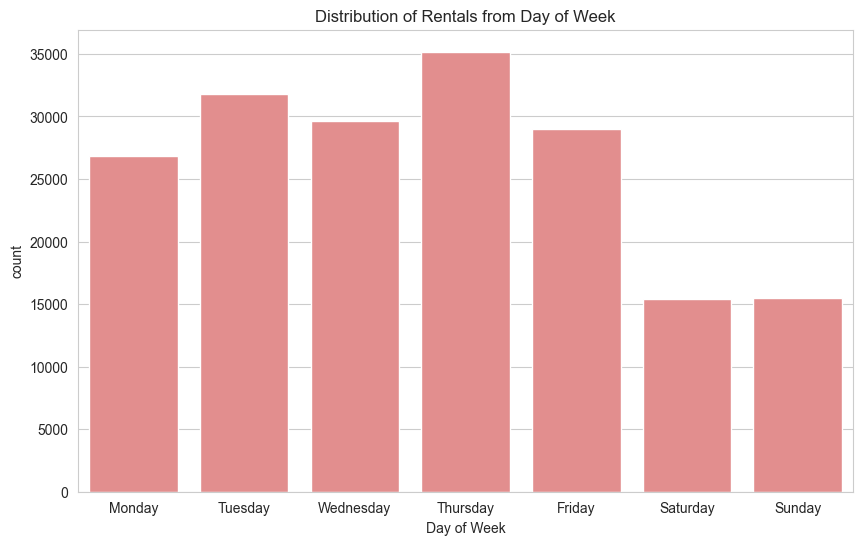

In [110]:
# distribution of rentals from day of week
def plot_day_of_week(df, x, title, xlabel, color='lightcoral', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], figsize=(10, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.countplot(x=x, data=df, color=color, order=order)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    plt.show()

plot_day_of_week(df, 'day_of_week', 'Distribution of Rentals from Day of Week', 'Day of Week')


10. What is the distribution of rental counts on hour of day?

In [111]:
# Extract hour from start_time
df['hour'] = df['start_time'].dt.hour

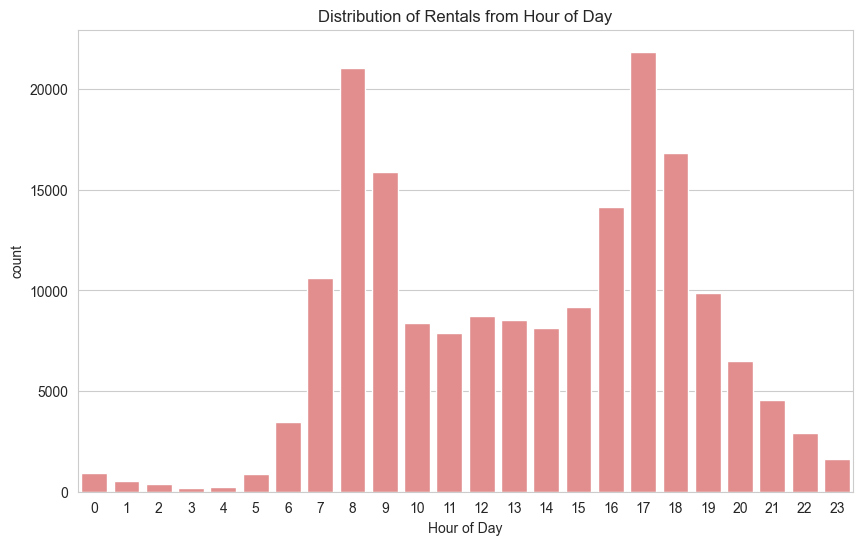

In [112]:
# distribution of rentals from hour of day
def plot_hour_of_day(df, x, title, xlabel, color='lightcoral', figsize=(10, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.countplot(x=x, data=df, color=color)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    plt.show()

plot_hour_of_day(df, 'hour', 'Distribution of Rentals from Hour of Day', 'Hour of Day')

11. What is the distribution of trip distances?

In [113]:
# Function get distance between two locations
def get_distances(lst):
    loc1 = (lst.iloc[0], lst.iloc[1])
    loc2 = (lst.iloc[2], lst.iloc[3])
    
    return geopy.distance.distance(loc1, loc2).m

In [114]:
# Create new column distance
attributes = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
df['distance'] = df[attributes].apply(get_distances, axis = 1)

In [115]:
# Describe distance
df['distance'].describe()

count    183215.000000
mean       1691.247186
std        1097.178647
min           0.000000
25%         909.777251
50%        1431.357962
75%        2227.240841
max       69465.977135
Name: distance, dtype: float64

In [116]:
# Quantile 99% of distance
df['distance'].quantile(.99)

5063.372424979236

In [117]:
# new statistics after cutting off above 1 meter and below .99 quantile
df.query('(distance > 1) & (distance < 5070)')['distance'].describe()

count    177564.000000
mean       1682.915003
std         976.655662
min          13.307064
25%         936.749271
50%        1445.277458
75%        2215.371960
max        5067.299998
Name: distance, dtype: float64

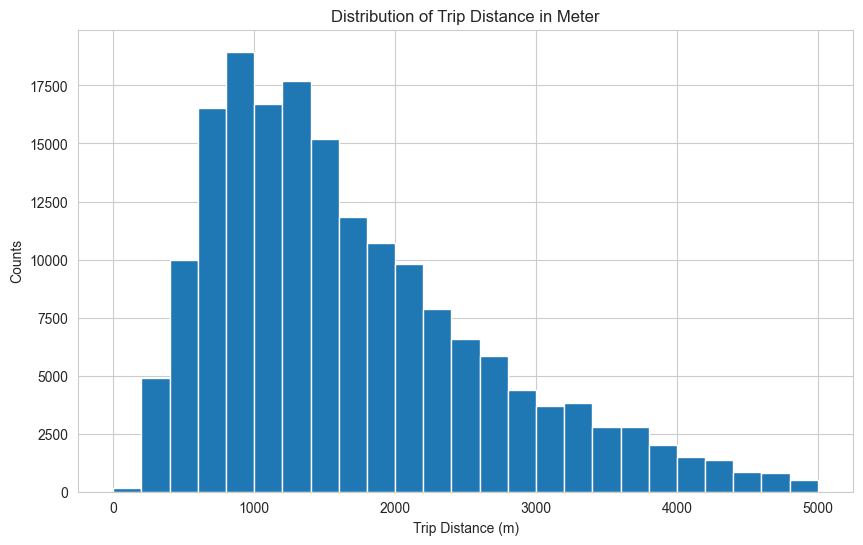

In [118]:
def plot_distance_distribution(df, x, query, bins, xlabel, ylabel, title, figsize=(10, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.hist(data=df.query(query), x=x, bins=bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

plot_distance_distribution(df, 'distance', '(distance > 1) & (distance < 5070)', np.arange(0, 5070, 200), 'Trip Distance (m)', 'Counts', 'Distribution of Trip Distance in Meter')

Insight: Trip Distance Distribution Analysis

Upon exploring the distribution of trip distances, a positively skewed pattern emerged. Key findings include:

Skewness: The distribution is positively (right)-skewed, indicating a concentration of shorter trip distances with a tail towards longer distances.

Average Distance: The average distance of each trip is approximately 1.68 kilometers, serving as a central measure for trip lengths.

Percentile Insights:

75th Percentile: 75% of the trips have distances within 2.22 kilometers, emphasizing that the majority of rides fall within this range.

In [119]:
# number of observations where distance < 1 m
df.query('distance < 1').shape[0]

3822

In [120]:
# percentage of within-1-meter trip in all the observations
df.query('distance < 1').shape[0]/df.shape[0]

0.020860737385039435

In [121]:
# the distance is < 1 m but the duration is > 10 min
df.query('(distance < 1) & (duration_sec > 600)').shape[0]/df.query('distance < 1').shape[0]

0.6355311355311355

Insight: Short-Distance Rides with Unexpected Durations

During the exploration, it was identified that there are 3,822 rides with recorded distances less than 1 meter, comprising 2.09% of the total observations. Surprisingly, 63.5% of these short-distance rides exhibited durations exceeding 10 minutes.

Potential Interpretation:
This unusual pattern raises the possibility that riders might be returning the bikes to the station where they initiated their rides. The extended durations could be attributed to users keeping the bikes temporarily before returning them, potentially for short errands or quick stops.

Consideration for Further Analysis:
Further investigation into the specific details of these rides, such as start and end stations, could provide valuable insights into user behaviors and motivations for such short-distance rides with extended durations.

12. What is the distribution of user's age?

In [122]:
# calculate age from birthyear
df['age'] = 2019 - df['member_birth_year']

In [123]:
df['age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

/var/folders/m0/l2rczrrd4sn2mdtcg6j3tc680000gn/T/ipykernel_72425/3369270424.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(range(18, 81, 1))


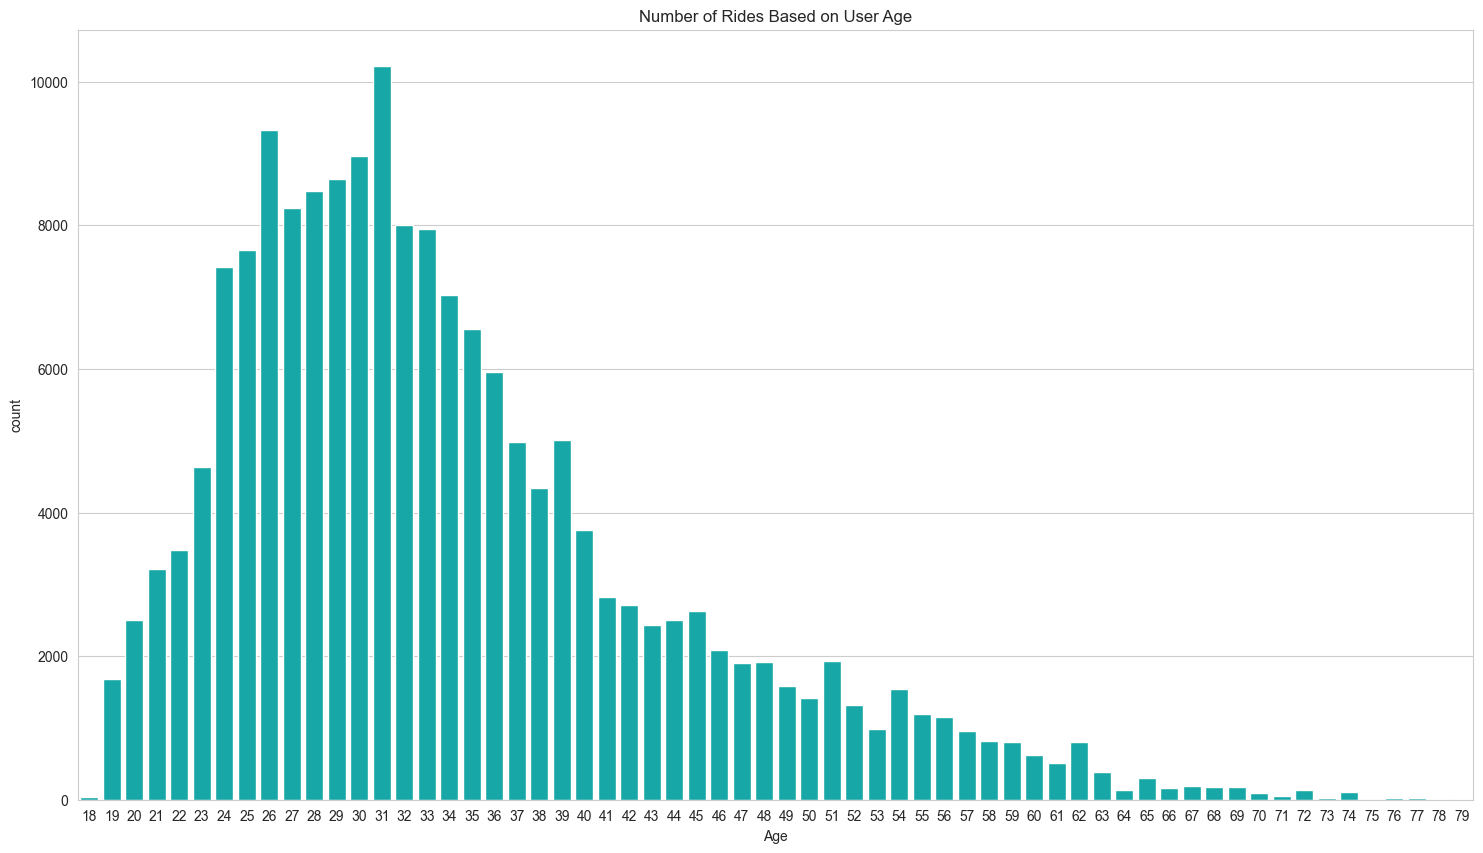

In [124]:
def plot_rides_based_on_age(df, x, title, query='age <= 80', color='c', figsize=(18, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.countplot(x=x, data=df.query(query), color=color)
    ax.set_xlabel('Age')
    ax.set_xticklabels(range(18, 81, 1))
    ax.set_title(title)
    plt.show()
    
plot_rides_based_on_age(df, 'age', 'Number of Rides Based on User Age')

13. Which start stations are the most popular?

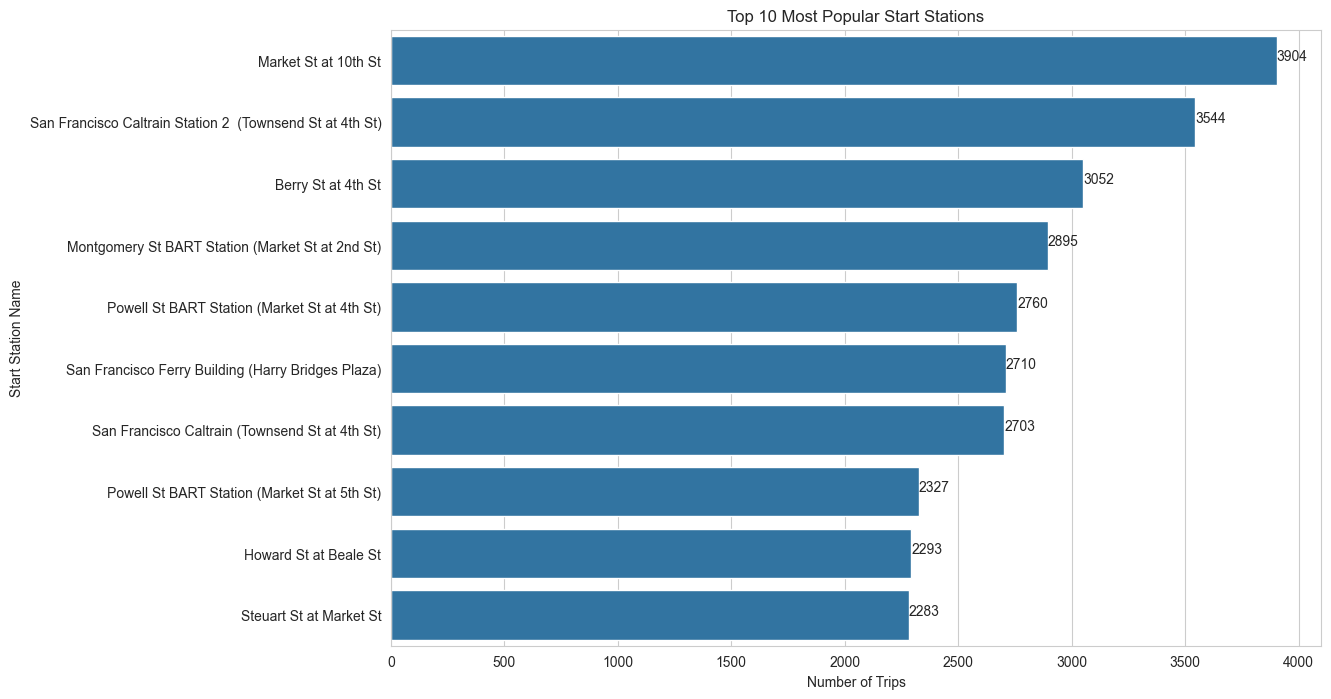

In [125]:
def plot_top_start_stations(df, station_column, top_n=10):
    # Get the top n most popular stations
    popular_stations = df[station_column].value_counts().head(top_n)
    
    plt.figure(figsize=(12,8))
    
    # Create a countplot of the top n stations
    sns.countplot(data=df, y=station_column, order=popular_stations.index, color=sns.color_palette()[0])
    
    # Set the labels and title
    plt.title(f'Top {top_n} Most Popular Start Stations')
    plt.xlabel('Number of Trips')
    plt.ylabel('Start Station Name')
    
    # Display the count on each bar
    for index, value in enumerate(popular_stations):
        plt.text(value, index, str(value))
    
    plt.show()

plot_top_start_stations(df, 'start_station_name')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The trip duration distribution exhibits a positive (right)-skew, revealing that the majority of rides are relatively short. With an average duration of 621 seconds (approximately 10.35 minutes) across 181,382 observations, 75% of riders complete their trips within 784 seconds (around 13.07 minutes).

Similarly, the distribution of trip distance also skews positively (right), indicating shorter journeys. The average distance per trip is approximately 1.68 kilometers, with 75% of trips falling within the range of 2.22 kilometers.

Analyzing user age, it is evident that the GoBike service is more popular among young riders. To rent a bike, users must be at least 18 years old, and 75% of users are below the age of 39. The highest frequency of rentals, exceeding 10,000 rides, is observed in the 31-year-old age group, highlighting the platform's popularity among young adults.

Examining user gender, male users dominate GoBike usage with around 130,000 recorded rides, while female users account for approximately 40,000 rides. Users with other gender specifications contribute to a smaller portion of the overall ride count.

Regarding user type, the dataset classifies users as either "Subscribers," who pay monthly or yearly membership fees, or "Customers," who pay for single trips or daily usage. Over 89.2% of the rental records are attributed to subscribers, emphasizing the loyalty and recurrent usage of this group.

The day-of-week rental counts indicate a notable disparity between weekdays and weekends. Weekday rides surpass 25,000 in any given day, while both Saturday and Sunday register around 15,000 rides each. This suggests that the majority of bike rides are associated with weekday work commutes.

Analyzing the rental counts by hour of the day, a bimodal distribution emerges with peaks at 8:00 am and 5:00 pm. This pattern aligns with typical rush hours, affirming that most users utilize rental bikes for daily work commutes.

In addressing outliers, particularly in the 'duration_sec' and 'distance' columns, a data-cleaning approach was applied. Data points beyond the 99th percentile were removed, and for the distance data, points below 1 meter were excluded. Given the dataset's substantial size, this process minimally impacts the overall results.

To delve into day-of-week and hour-of-day distributions, the data type of 'start_time' and 'end_time' was transformed to datetime. Utilizing the to_datetime method provided valuable day-of-week and hour information, enriching the dataset for more detailed temporal analyses.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Unusual Distributions:

Member Birth Years (member_birth_year): The distribution of member birth years showed some unusual points, including negative values. This is unexpected as birth years should be positive integers.

Operations on the Data:

Log Transformation on Trip Durations (duration_sec): The initial distribution of trip durations was right-skewed with a long tail. To better visualize the distribution and highlight patterns in shorter trips, a log transformation was applied. This transformation helped create a more symmetrical distribution.

Addressing Negative Birth Years: The presence of negative values in the member birth year variable indicates potential data quality issues. To tidy the data and ensure accurate analysis, further investigation and cleaning will be necessary to handle these anomalies. This may involve removing or imputing the incorrect values.

Reasoning:

- The log transformation on trip durations was performed to make the distribution more interpretable and identify patterns, especially in the context of shorter trips.
- Addressing negative birth years is crucial for maintaining data integrity. Negative birth years may be the result of data entry errors or anomalies that need to be corrected to ensure the dataset's reliability for subsequent analyses.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

- How are the rental counts distributed on day of week by user gender?
- How are the rental counts distributed on day of week by user type?
- What is the average ride distance by day of month?
- What is the average ride duration by day of month?
- What is the ride duration distribution at the 5 most visited stations?
- What is the relation between ride distance and duration?

1. How are the rental counts distributed on day of week by user gender?

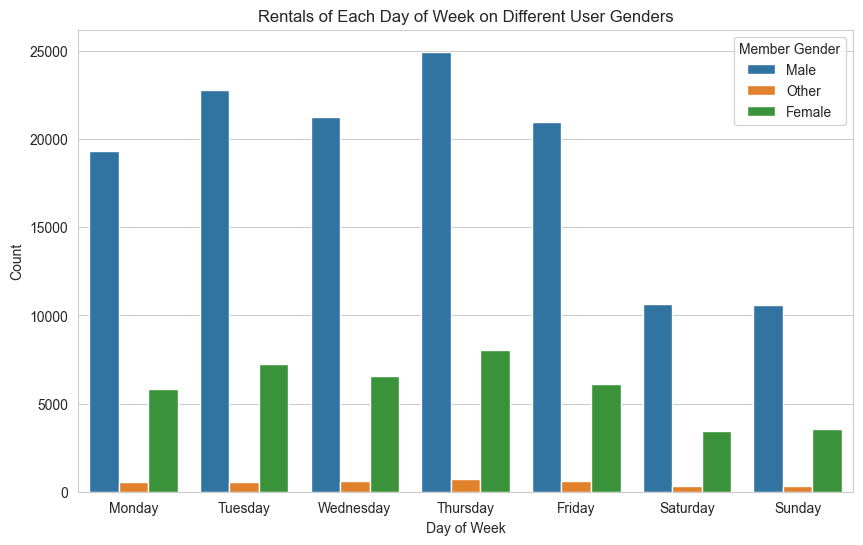

In [126]:
def plot_day_of_week_gender(df, x, hue, title, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], figsize=(10, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.countplot(x=x, hue=hue, data=df, order=order)
    ax.set_title(title)
    # change title of x axis and y axis
    plt.xlabel('Day of Week')
    plt.ylabel('Count')
    plt.legend(title='Member Gender')
    plt.show()

plot_day_of_week_gender(df, 'day_of_week', 'member_gender', 'Rentals of Each Day of Week on Different User Genders')

2. How are the rental counts distributed on day of week by user type?

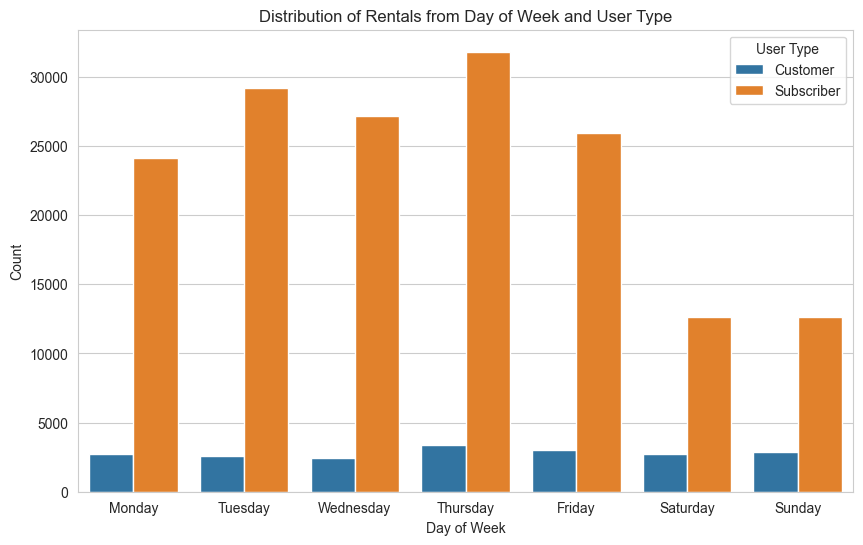

In [127]:
def plot_day_of_week_user_type(df, x, hue, title, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], figsize=(10, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.countplot(x=x, hue=hue, data=df, order=order)
    ax.set_title(title)
    plt.xlabel('Day of Week')
    plt.ylabel('Count')
    plt.legend(title='User Type')
    plt.show()

plot_day_of_week_user_type(df, 'day_of_week', 'user_type', 'Distribution of Rentals from Day of Week and User Type')

3. What is the average ride distance by day of month?

In [128]:
# Add day of month column
df['day_of_month'] = df['start_time'].dt.day

In [129]:
weekend_days = [2, 3, 9, 10, 16, 17, 23, 24]

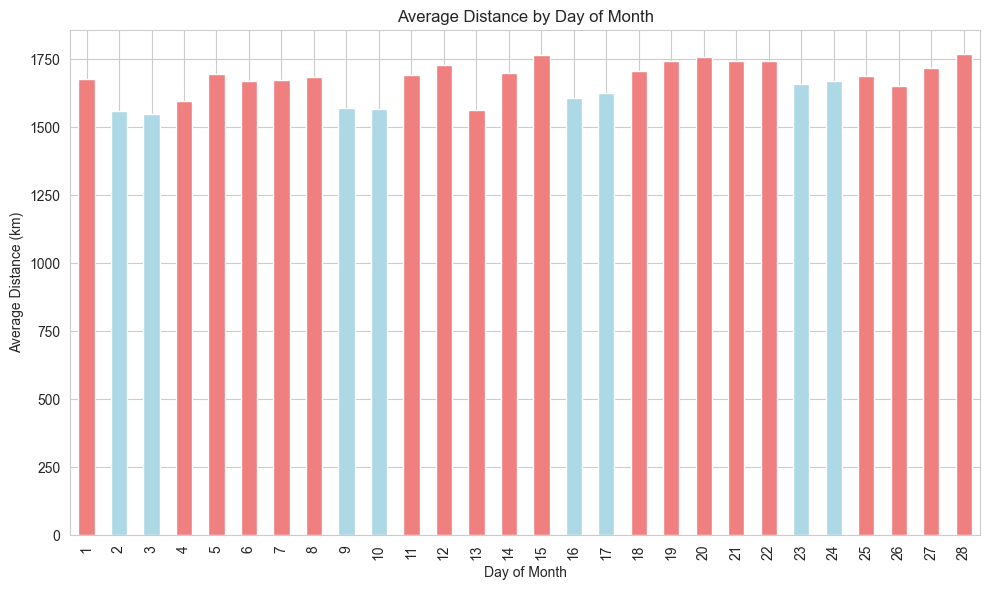

In [130]:
def plot_avg_distance_by_day(df, groupby_column, value_column, title, xlabel, ylabel, weekday_color, weekend_color, figsize=(10, 6)):
    df_avg_distance = df.groupby(groupby_column)[value_column].mean()
    
    # Create a color list with different colors for weekdays and weekends
    colors = [weekend_color if day in weekend_days else weekday_color for day in df_avg_distance.index]
    
    df_avg_distance.plot.bar(figsize=figsize, color=colors)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

plot_avg_distance_by_day(df, 'day_of_month', 'distance', 'Average Distance by Day of Month', 'Day of Month', 'Average Distance (km)', 'lightcoral', 'lightblue')

4. What is the average ride duration by day of month?

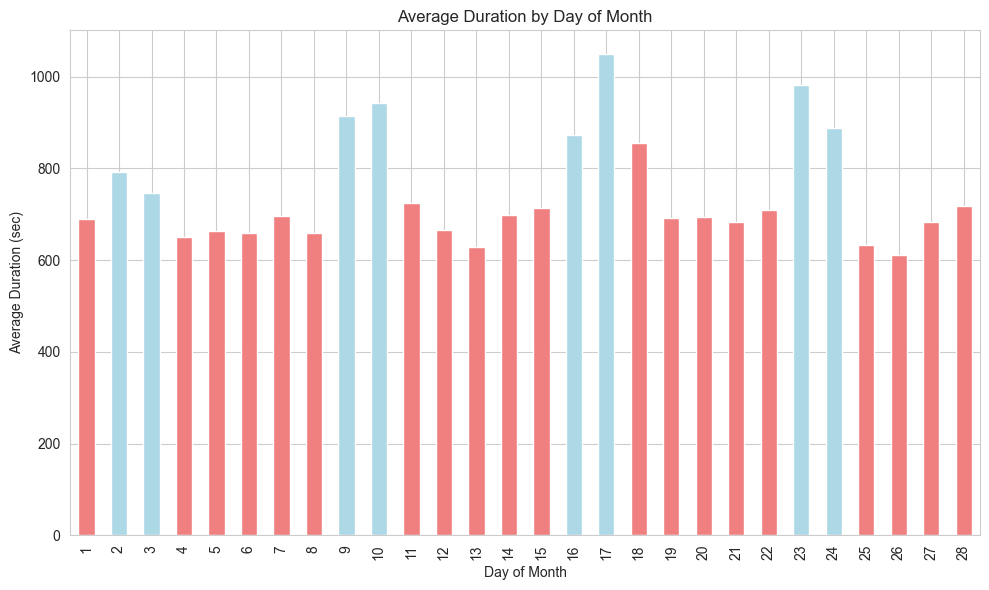

In [131]:
def plot_avg_duration_by_day(df, groupby_column, value_column, title, xlabel, ylabel, weekday_color, weekend_color, figsize=(10, 6)):
    df_avg_distance = df.groupby(groupby_column)[value_column].mean()

     # Create a color list with different colors for weekdays and weekends
    colors = [weekend_color if day in weekend_days else weekday_color for day in df_avg_distance.index]
    
    df_avg_distance.plot.bar(figsize=figsize, color=colors)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

plot_avg_duration_by_day(df, 'day_of_month', 'duration_sec', 'Average Duration by Day of Month', 'Day of Month', 'Average Duration (sec)', 'lightcoral', 'lightblue')

5. What is the ride duration distribution at the 5 most visited stations?

In [132]:
# Find top 5 start stations with most rentals
top_5_start_stations = df['start_station_name'].value_counts().head(5).index

df_top5_stations = df.query('duration_sec < 3457').loc[df['start_station_name'].isin(top_5_start_stations)]

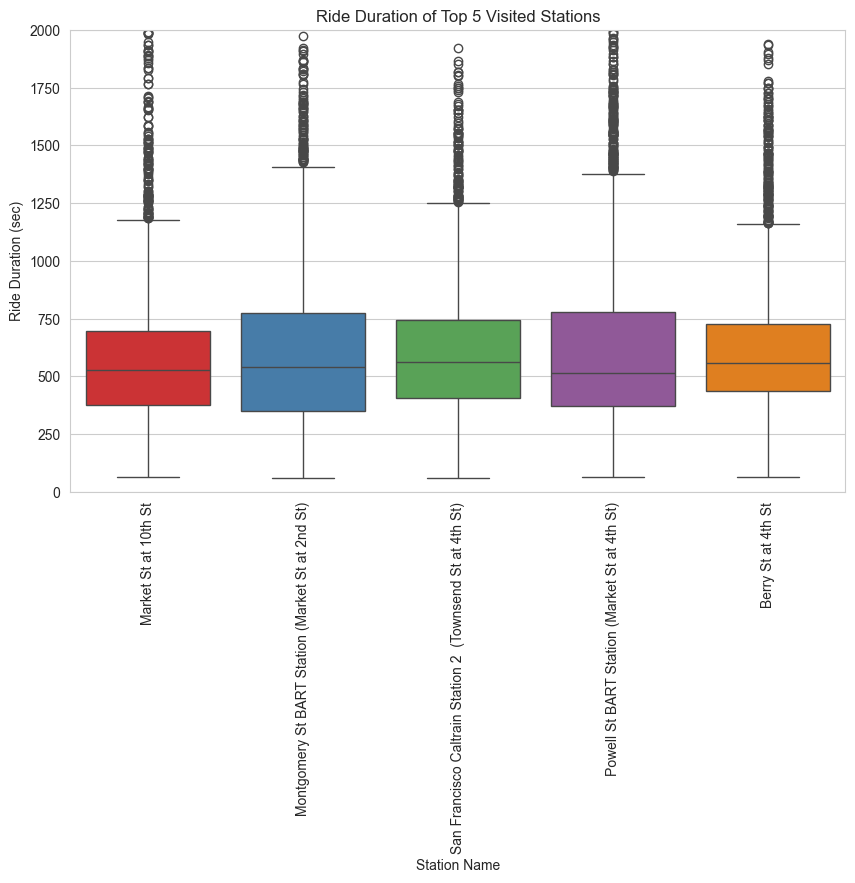

In [133]:
def plot_ride_duration_of_stations(df, x, y, title, xlabel, ylabel, ylim, rotation=90, figsize=(10, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.boxplot(x=x, y=y, data=df, palette='Set1', hue=x)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.ylim(ylim)
    plt.show()

plot_ride_duration_of_stations(df_top5_stations, 'start_station_name', 'duration_sec', 'Ride Duration of Top 5 Visited Stations', 'Station Name', 'Ride Duration (sec)', (0, 2000))

6. What is the relation between ride distance and duration?

In [134]:
# Tidy data by using 10 & 90 percentiles
df['duration_sec'].describe(percentiles=[.1, .9])

count    183215.000000
mean        725.902017
std        1795.078654
min          61.000000
10%         214.000000
50%         514.000000
90%        1178.000000
max       85444.000000
Name: duration_sec, dtype: float64

In [135]:
def query_quantile(df, column, lower_quantile, upper_quantile):
    lower_bound, upper_bound = df[column].quantile([lower_quantile, upper_quantile])
    return df.query(f'({column} < {upper_bound}) & ({column} > {lower_bound})')

df_quantiled_bike = query_quantile(df, 'duration_sec', 0.1, 0.9)

In [136]:
def calculate_correlation(df, column1, column2, df_filtered = df_quantiled_bike):
    # Calculate the correlation coefficient between two columns
    correlation = df_filtered[column1].corr(df_filtered[column2])
    
    return correlation

correlation = calculate_correlation(df, 'duration_sec', 'distance')
print(correlation)

0.7459935605464272


In [137]:
def perform_linear_regression(df, x_column, y_column):
    # Create a linear regression model
    regression_model = LinearRegression()
    
    # Split the data into features (x) and target (y)
    x = df[[x_column]]
    y = df[[y_column]]
    
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Fit the data to the model
    regression_model.fit(x_train, y_train)
    
    # Predict the values with the x data to get the trend line
    df.loc[:, "trend_line"] = regression_model.predict(x)
    
    # Return the model and the DataFrame with the trend line
    return regression_model, df

regression_model, df_with_trend = perform_linear_regression(df_quantiled_bike, 'duration_sec', 'distance')

/var/folders/m0/l2rczrrd4sn2mdtcg6j3tc680000gn/T/ipykernel_72425/3643895682.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "trend_line"] = regression_model.predict(x)


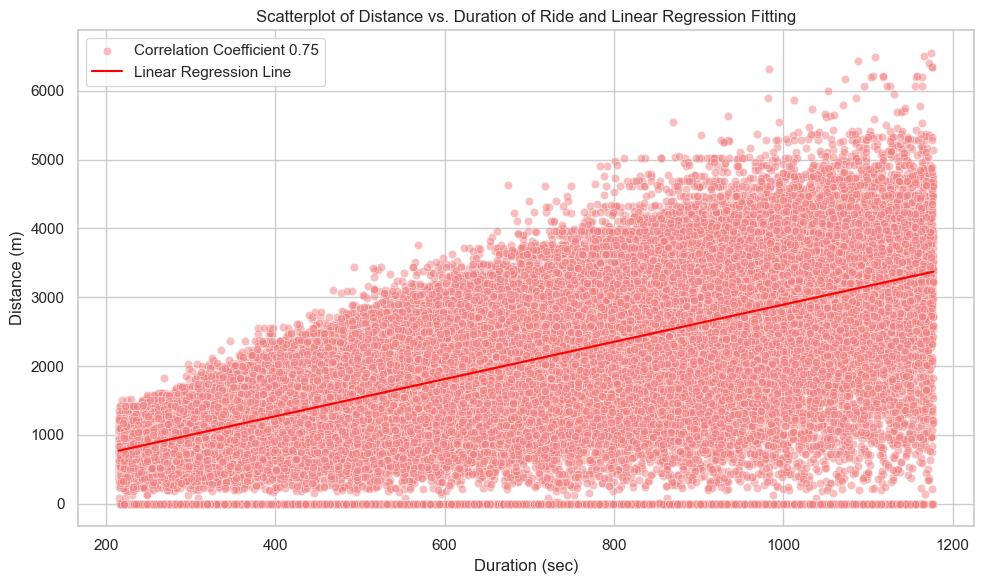

In [138]:
def plot_scatterplot_with_trendline(df, x_column, y_column, trend_column, correlation, figsize=(10, 6)):
    with sns.plotting_context("notebook"):
        # Create a matplotlib figure
        fig, ax = plt.subplots(figsize=figsize)

        # Plot the scatterplot of y_column vs x_column
        sns.scatterplot(x=x_column, y=y_column, data=df,
                        label=f"Correlation Coefficient {correlation:.2f}", alpha=0.5, color="lightcoral")

        # Plot the trend line
        sns.lineplot(x=x_column, y=trend_column, data=df,
                     label="Linear Regression Line", color="r")

        # Set the title, legend, x & y labels
        ax.set_title(
            'Scatterplot of Distance vs. Duration of Ride and Linear Regression Fitting')
        ax.legend(loc='best')
        ax.set_xlabel('Duration (sec)')
        ax.set_ylabel('Distance (m)')
        plt.tight_layout()
        plt.show()


plot_scatterplot_with_trendline(
    df_with_trend, 'duration_sec', 'distance', 'trend_line', correlation)

For the subset of the GoBike dataset, obtained by considering observations between the 10th and 90th percentiles based on trip duration (duration_sec), a notable positive correlation of 0.75 is observed between trip distance and duration. This correlation aligns with expectations, indicating that as the distance of the trip increases, the corresponding time required for the journey also tends to increase. This positive correlation coefficient of 0.75 underscores the relationship between distance and duration, providing valuable insights into the temporal dynamics of GoBike rides.

7. The relationship between two categorical variables

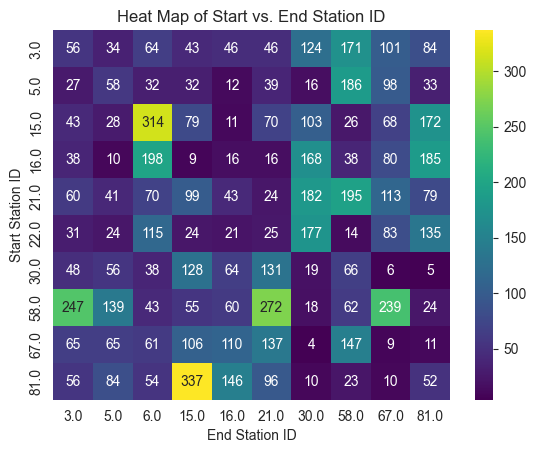

In [139]:
def plot_station_relationship(df, start_station_column, end_station_column, top_n=10):
    # Get the top n start and end stations
    start_stations = df[start_station_column].value_counts().index[:top_n]
    end_stations = df[end_station_column].value_counts().index[:top_n]
    
    # Filter the data for these stations
    heatmap_data = df[df[start_station_column].isin(start_stations) & df[end_station_column].isin(end_stations)]
    
    # Create a pivot table of the number of trips between each pair of stations
    pivot_table = heatmap_data.pivot_table(index=start_station_column, columns=end_station_column, aggfunc='size', fill_value=0)
    
    # Create a heatmap of the pivot table
    sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis')
    
    # Set the labels and title
    plt.title('Heat Map of Start vs. End Station ID')
    plt.xlabel('End Station ID')
    plt.ylabel('Start Station ID')
    plt.show()

plot_station_relationship(df, 'start_station_id', 'end_station_id')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Following the exploratory analysis of the variables, the following observations have been made:

Subscriber vs. Customer Rentals:

When comparing day-of-week rentals between subscribers and customers, the majority of rentals are attributed to subscribers across all days of the week.
Gender-Based Rental Patterns:

Similar patterns emerge in day-of-week rentals across different genders (male, female, other), with higher usage recorded on weekdays compared to weekends, suggesting a predominant usage for commuting purposes.
Distance vs. Day of Month:

Analysis of the distance vs. day-of-month graph reveals that, on average, trip distances tend to be longer on weekdays (averaging between 1.7 to 1.8 km) compared to weekends (averaging between 1.6 to 1.7 km).
Duration Patterns on Weekdays vs. Weekends:

Users embark on shorter trips during weekdays, with durations ranging from 10 to 12 minutes. In contrast, the average duration on weekends extends to 13 to 18 minutes, indicating potential differences in user behavior on different days.
Top 5 Start Stations:

The top 5 start stations exhibit similar statistics in ride duration. They share median values around 500 seconds, with interquartile ranges falling between 250 seconds to 400 seconds. Outliers are also noted in the dataset for each station.
Trimmed GoBike Dataset:

For the trimmed dataset (observations between the 10th and 90th percentiles based on duration_sec), a highly positive correlation of 0.75 is observed between trip distance and duration. This aligns with expectations, indicating that as the distance of the trip increases, the corresponding time required for the journey also increases.
These observations provide valuable insights into user behavior, usage patterns on different days, and the relationships between trip duration and distance. Further analysis and interpretation can be carried out to derive actionable conclusions for the GoBike service.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Highlighted Relationships Between Features:

Subscriber vs. Customer Rental Patterns:

Notably, for subscribers, a distinct pattern emerges in their rental behavior based on the day of the week. The majority of rentals occur during weekdays, with over 10,000 more rentals in total compared to weekends. This pattern strongly suggests that subscribers predominantly use GoBike for commuting purposes. In contrast, customers exhibit a more stable rental count throughout the week, with fewer total rentals (ranging from 3,000 to 4,000). This stability could be indicative of tourist-related rentals in the Bay area.
Trip Distance Variation Between Weekdays and Weekends:

A noteworthy relationship is observed when comparing the average trip distance between weekdays and weekends. On weekdays, the average trip distance is longer, ranging between 1.7 to 1.8 km. In contrast, on weekends, the average trip distance is slightly shorter, averaging between 1.6 to 1.7 km.
Duration Discrepancy Between Weekdays and Weekends:

An intriguing inverse relationship is noted between trip duration and days of the week. On weekdays, users embark on shorter trips, typically lasting between 10 to 12 minutes. In contrast, on weekends, the average duration of trips increases, ranging from 13 to 18 minutes. This suggests a shift in user behavior, possibly indicating more leisurely or exploratory rides during weekends.
These identified relationships provide valuable insights into the distinct usage patterns of subscribers and customers, as well as variations in trip characteristics based on the day of the week. Further exploration and analysis can uncover additional nuances and contribute to a deeper understanding of user behavior within the GoBike service.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

- What is the distribution of ride duration based on gender and age
- Number of rides during day of week per age group
- What is average trip distance during each hour of day in different regions?
- What is average trip duration during each hour of day in different regions?
- What is the distribution of trip durations for different user types and for different genders.

1. What is average trip distance during each hour of day in different regions?

In [140]:
def get_region(x):
    if x < -122.35:
        return 'San Francisco'
    elif x < -122.10:
        return 'Oakland'
    else:
        return 'San Jose'

In [141]:
df['region'] = df['start_station_longitude'].apply(get_region)

In [142]:
df['region'].value_counts()

region
San Francisco    133708
Oakland           41434
San Jose           8073
Name: count, dtype: int64

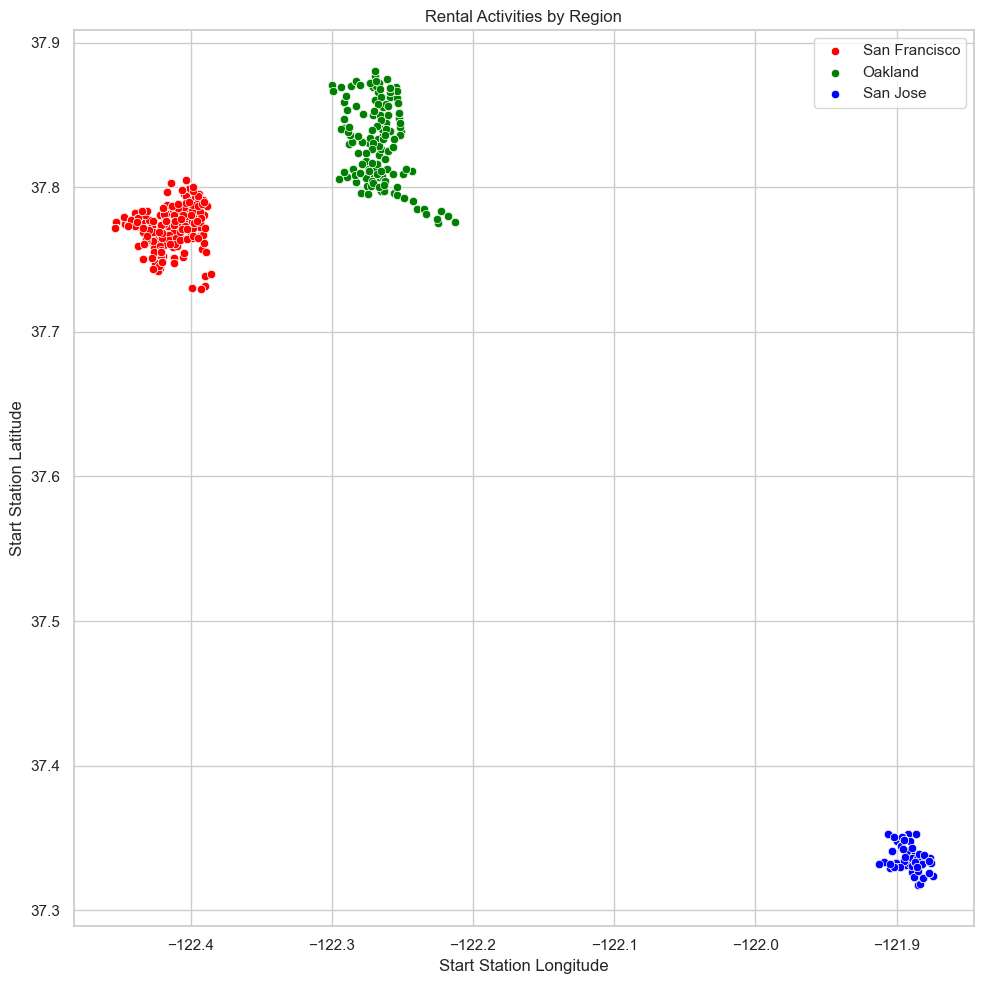

In [143]:
def plot_station_coordinates_by_region(df, latitude_column, longitude_column, region_column, regions, colors, figsize=(10, 10)):
    with sns.plotting_context("notebook"):
        # Create a matplotlib figure
        fig, ax = plt.subplots(figsize=figsize)

        # Plot the scatterplot of latitude vs longitude for each region
        for region, color in zip(regions, colors):
            sns.scatterplot(y=latitude_column, x=longitude_column,
                            data=df.query(f"{region_column} == '{region}'"),
                            label=region, color=color)

        # Set the title, labels, and legend
        plt.title('Rental Activities by Region')
        plt.ylabel('Start Station Latitude')
        plt.xlabel('Start Station Longitude')
        plt.legend()
        plt.tight_layout()
        plt.show()


plot_station_coordinates_by_region(df, 'start_station_latitude', 'start_station_longitude', 'region',
                                   ['San Francisco', 'Oakland', 'San Jose'], ['r', 'g', 'b'])

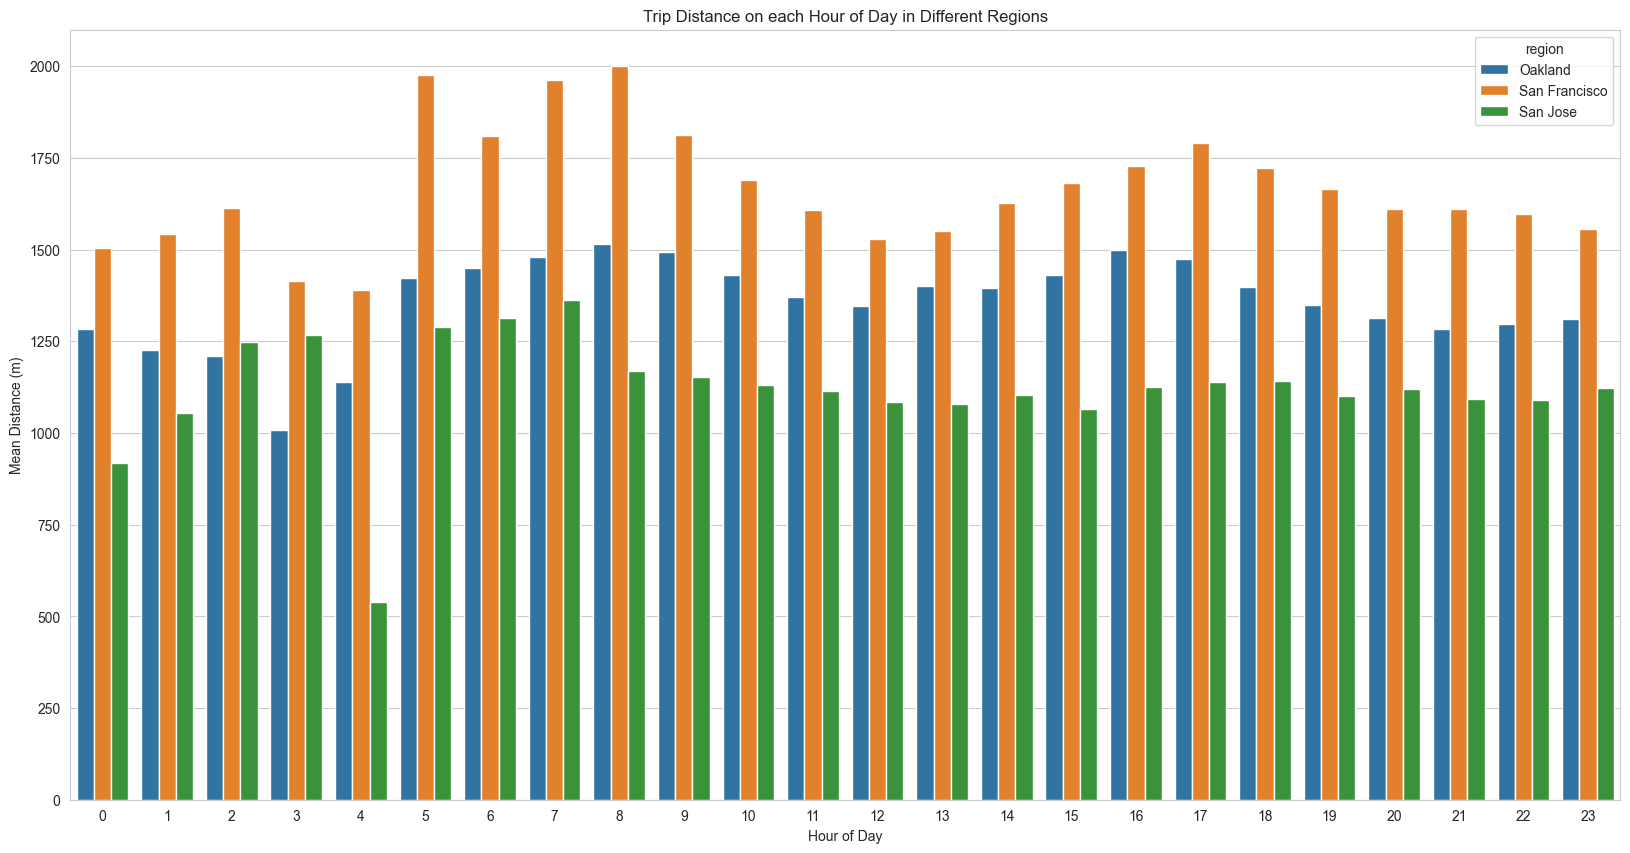

In [144]:
def plot_trip_distance_by_hour(df, hour_column, distance_column, region_column, distance_cutoff, figsize=(20, 10)):
    # Create a matplotlib figure
    fig, ax = plt.subplots(figsize=figsize)

    # Create a barplot of mean distance vs hour for each region
    sns.barplot(x=hour_column, y=distance_column,
                data=df.query(f"{distance_column} < {distance_cutoff}").groupby(
                    [hour_column, region_column], as_index=False)[distance_column].mean(),
                hue=region_column)

    # Set the title
    plt.xlabel('Hour of Day')
    plt.ylabel('Mean Distance (m)')
    plt.title('Trip Distance on each Hour of Day in Different Regions')
    plt.show()


plot_trip_distance_by_hour(df, 'hour', 'distance', 'region', 5070)

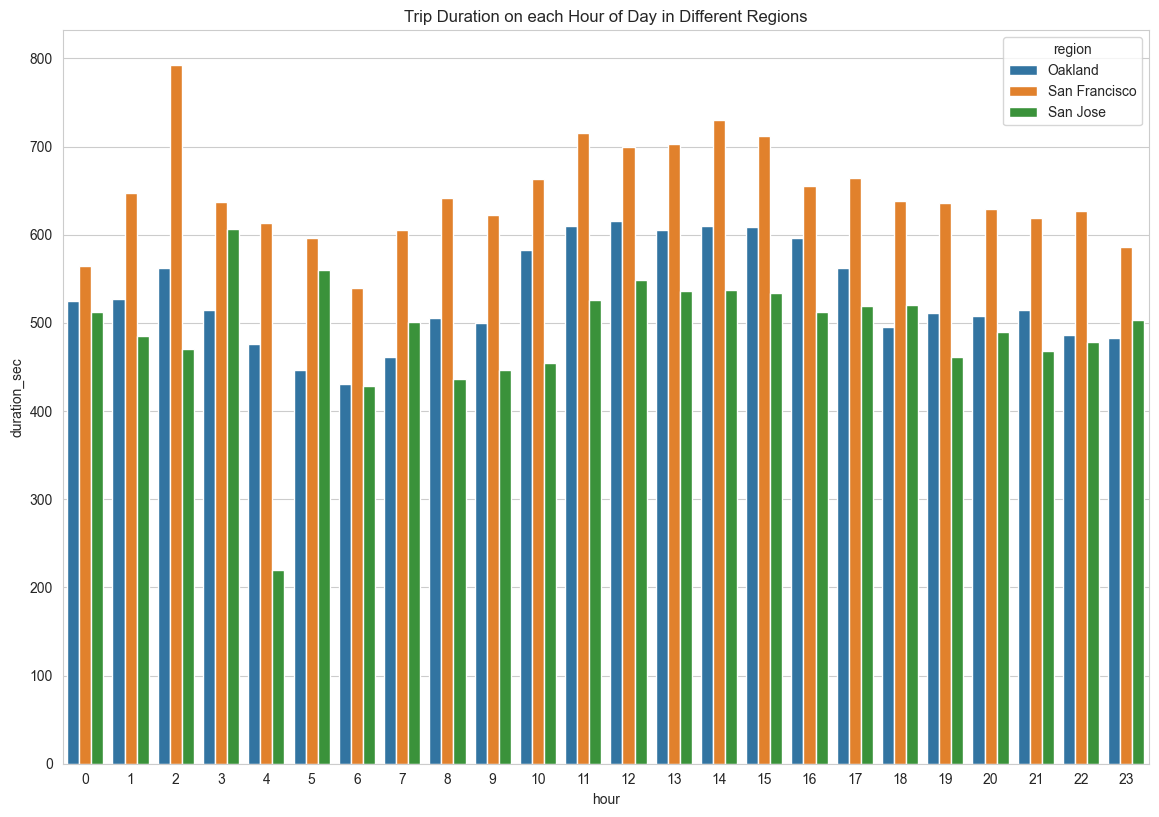

In [145]:
def plot_trip_duration_by_hour(df, hour_column, duration_column, region_column, duration_cutoff, figsize=(11.69, 8.27)):
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=figsize)

    # Create a barplot of mean duration vs hour for each region
    sns.barplot(x=hour_column, y=duration_column,
                data=df.query(f"{duration_column} < {duration_cutoff}").groupby(
                    [hour_column, region_column], as_index=False)[duration_column].mean(),
                hue=region_column)

    # Set the title
    plt.title('Trip Duration on each Hour of Day in Different Regions')
    plt.tight_layout()
    plt.show()


plot_trip_duration_by_hour(df, 'hour', 'duration_sec', 'region', 3457)

2. What is average trip duration during each hour of day in different regions?

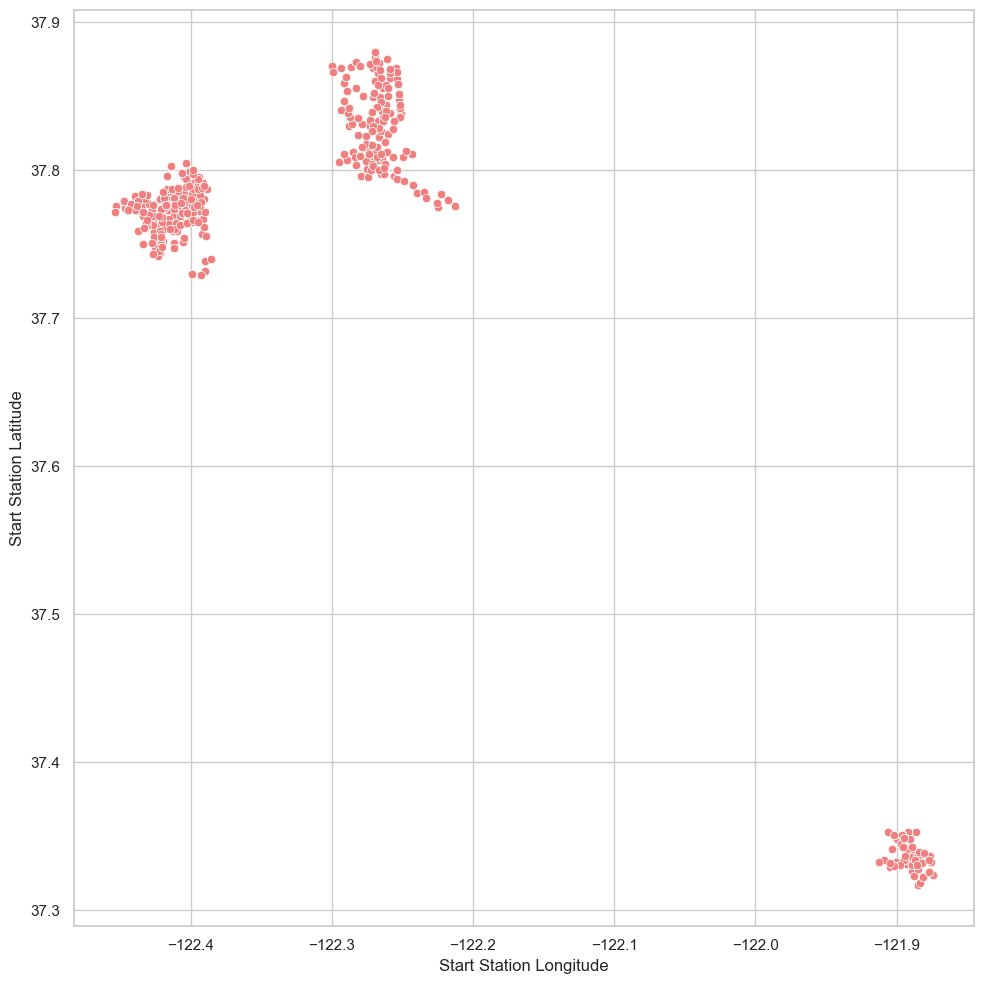

In [146]:
def plot_station_coordinates(df, latitude_column, longitude_column, figsize=(10, 10)):
    with sns.plotting_context("notebook"):
        # Create a matplotlib figure
        fig, ax = plt.subplots(figsize=figsize)
        
        # Plot the scatterplot of latitude vs longitude
        sns.scatterplot(y=latitude_column, x=longitude_column, data=df, color='lightcoral')
        
        # Set the labels
        plt.ylabel('Start Station Latitude')
        plt.xlabel('Start Station Longitude')
        plt.tight_layout()
        plt.show()

plot_station_coordinates(df, 'start_station_latitude', 'start_station_longitude')

3. Number of rides during day of week per age group

In [147]:
age_bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 99]
age_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

df['age_group'] = pd.cut(df['age'], bins = age_bins, labels = age_labels, right = False)
df[['age','age_group']].head()

,age,age_group
0,35.0,30-39
1,NaN,NaN
2,47.0,40-49
3,30.0,30-39
4,45.0,40-49


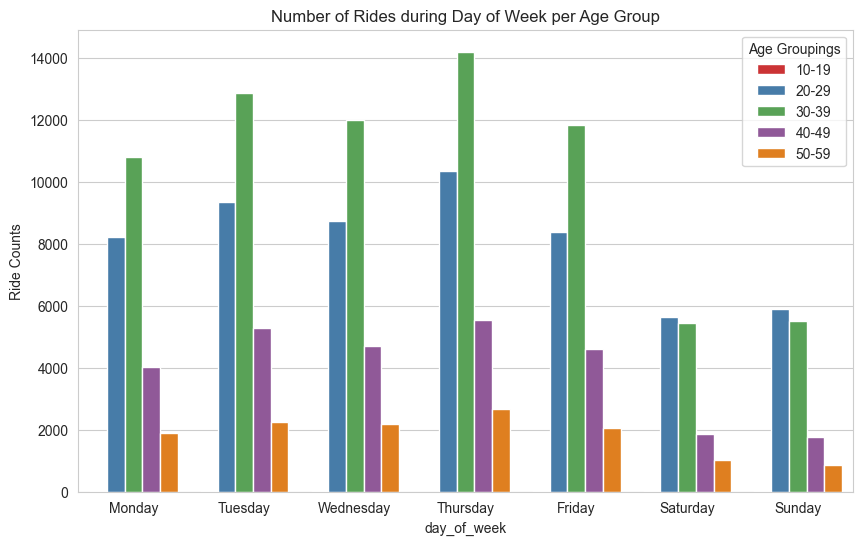

In [148]:
def plot_ride_counts_by_age_group(df, age_group_column, day_of_week_column, age_groups, days_of_week, figsize=(10, 6)):
    # Filter DataFrame for desired age groups
    df_filtered = df.loc[df[age_group_column].isin(age_groups)]
    
    # Create plot
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df_filtered, x=day_of_week_column, hue=age_group_column, order=days_of_week, palette='Set1', hue_order=age_groups)
    plt.title('Number of Rides during Day of Week per Age Group')
    plt.legend(title='Age Groupings', loc='upper right')
    plt.ylabel('Ride Counts')
    plt.show()

plot_ride_counts_by_age_group(df, 'age_group', 'day_of_week', 
                              ['10-19', '20-29', '30-39', '40-49', '50-59'], 
                              ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

4. What is distribution of ride duration based on gender and age

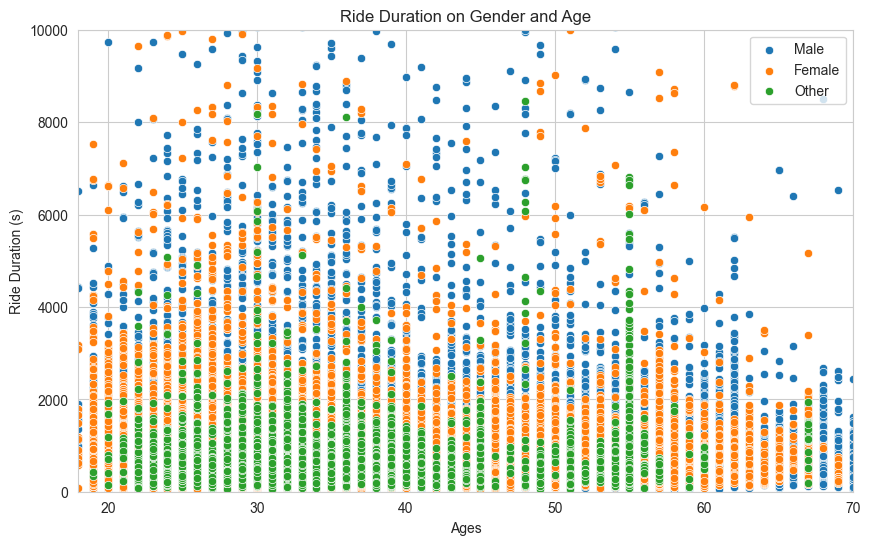

In [149]:
def plot_scatterplot_by_gender(df, x_column, y_column, gender_column, genders, xlim, ylim, figsize=(10, 6)):
    plt.figure(figsize=figsize)

    # Query each gender subset and plot separately
    for gender in genders:
        df_gender = df[df[gender_column] == gender]
        sns.scatterplot(x=x_column, y=y_column, data=df_gender, label=gender)

    plt.legend()
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title('Ride Duration on Gender and Age')
    plt.xlabel('Ages')
    plt.ylabel('Ride Duration (s)')
    plt.show()


plot_scatterplot_by_gender(df, 'age', 'duration_sec', 'member_gender', [
                           'Male', 'Female', 'Other'], (18, 70), (0, 10000))

5. What is the distribution of trip durations for different user types and for different genders.

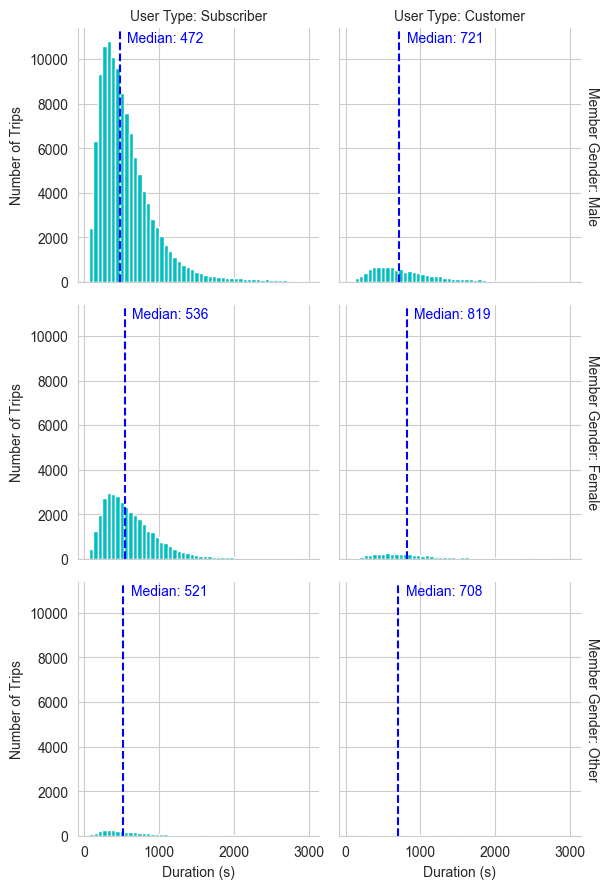

In [150]:
def plot_duration_distribution(df, duration_column, user_type_column, gender_column, duration_cutoff):
    # Filter out extreme values
    data_filtered = df[df[duration_column] < duration_cutoff]

    # Create the FacetGrid
    g = sns.FacetGrid(data_filtered, col=user_type_column, row=gender_column, margin_titles=True)
    g.map(plt.hist, duration_column, bins=50, color='c')

    # Add a vertical line to denote the median of each subplot's data
    for (row_val, col_val), ax in g.axes_dict.items():
        subset = data_filtered[(data_filtered[user_type_column] == col_val) & (data_filtered[gender_column] == row_val)]
        median_val = subset[duration_column].median()
        ax.axvline(median_val, color='blue', linestyle='--')
        ax.text(median_val + 100, ax.get_ylim()[1] - 100, f'Median: {median_val:.0f}', color='blue', va='top')

    # Set the axis labels
    g.set_axis_labels("Duration (s)", "Number of Trips")
    g.set_titles(row_template = 'Member Gender: {row_name}', col_template = 'User Type: {col_name}')

    # Display the plot
    plt.show()

plot_duration_distribution(df, 'duration_sec', 'user_type', 'member_gender', 3000)

In [151]:
# Export cleaned dataset to csv
df.to_csv('201902-fordgobike-tripdata-cleaned.csv', index=False)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Gender-Based Ride Durations:
Across different age groups, ride durations from users with gender labels other than male and female tend to be shorter on average. Notably, ride duration values exceeding 4000 seconds (67 minutes), likely outliers, are predominantly associated with male users (depicted in blue). This observation suggests a potential trend where male users might exhibit longer, less cautious ride durations compared to their female counterparts.

Age Group Analysis on Weekdays vs. Weekends:
During weekdays, the 30-39 age group dominates the rentals, followed by the 20-29 age group with a substantial difference in rental counts. However, on weekends, the pattern shifts, and the 20-29 age group leads in rental counts, albeit with a narrower margin compared to weekdays. This shift implies varying usage patterns based on age during different days of the week.

Regional Comparison: Rental Counts:
Rental counts are distributed across three regions: 133,708 rentals in San Francisco, 41,434 rentals in Oakland, and 8,073 rentals in San Jose. This highlights San Francisco as the primary area of bike rentals, likely due to its larger population and urban density.

Regional Comparison: Ride Distance Over Hour:
Comparing ride distances over hours in San Francisco, Oakland, and San Jose reveals similar rush-hour patterns, with peaks around 8 am and 5 pm. San Francisco records the longest average trip distance (over 1.5 km), followed by Oakland (~1.4 km) and San Jose (~1.2 km), aligning with the expected population density trend.

Regional Comparison: Ride Duration Over Hour:
Examining ride durations over hours in the different regions shows a consistent pattern, with a peak around noon. San Francisco records the longest average trip duration (over 10 minutes), followed by Oakland (~9.2 minutes) and San Jose (~8.3 minutes). Again, this trend aligns with the expected population density, indicating longer trip durations in more populous areas.

Work Commuting Patterns:
The significant usage of rentals by the 30-39 age group during weekdays strengthens the inference that GoBike usage on weekdays is primarily for work commuting purposes.

### Were there any interesting or surprising interactions between features?

Ride Distance Over Hour:
Across all regions (San Francisco, Oakland, and San Jose), the average ride distance exhibits a consistent rush-hour pattern, with peaks around 8 am and 5 pm. This aligns with expectations, indicating that during these times, riders are likely covering longer distances, potentially for work commutes or other scheduled activities.

Ride Duration Over Hour:
In contrast to ride distance, the average ride duration over the hour shows a different pattern. The peak in ride duration is observed around noon. One plausible explanation for this pattern is that around noon, users may rent bikes for short trips to get lunch or run errands nearby. While these trips cover shorter distances, the duration is longer, as individuals may take their time during the lunch break or leisurely activities.

During rush hours (8 am and 5 pm), when riders are likely commuting longer distances, the ride duration is shorter. This could be attributed to a more direct and time-efficient route taken during rush-hour commutes, such as from workplaces to metro stations.

## Conclusions

In this project, we delved into the Ford GoBike system data, conducting a thorough analysis through univariate, bivariate, and multivariate explorations. Addressing key questions and beyond, here are some notable insights:

Peak Trip Times:

Time of Day: Most trips are concentrated at 8 am and 5 pm, indicating peak commuting hours.
Day of Week: Weekdays see the highest number of trips, with a notable drop during weekends.
Average Trip Duration:

On average, a trip lasts 621 seconds (10.35 minutes). Further breakdown:
Subscribers: 589 seconds (9.82 minutes)
Customers: 904 seconds (15.07 minutes)
Subscriber vs. Customer Impact:

The average trip duration differs significantly between subscribers and customers, suggesting varying usage patterns. Subscribers tend to have shorter, more frequent rides, while customers opt for longer, potentially more leisurely trips.


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



In [152]:
# Export notebook to html
!python3 -m nbconvert --to html Part_I_exploration_template.ipynb

[NbConvertApp] Converting notebook Part_I_exploration_template.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 30 image(s).
[NbConvertApp] Writing 2662134 bytes to Part_I_exploration_template.html


In [153]:
# Open html file in browser
!open Part_I_exploration_template.html